# One dimension convolutional networks

In this notebook we train several convolutional networks and evaluate their accuracy for the stated problem (classification of EEG signals).

In [1]:
%cd ..

/home/Documents/EPFL/MA2/deep_learning/deep_learning_epfl/project1/src


In [1]:
import numpy as np

from loading import load_data, save_obj, load_obj

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

from cross_validation import early_stopping
from cross_validation import cross_validation

from visualization import plot_history

In [2]:
one_khz = False

x_train, y_train = load_data(one_khz=one_khz)
x_test, y_test = load_data(train=False, one_khz=one_khz)

## Basic convolutional network with 1 convolution

We use this basic convolutional network with only one convolution to test hyper-parameters such as the learning rate or the type of optimizer. We evaluate the performances with cross validation and will further improve this model adding more layers or tricks such as dropout and batch normalization.

In [18]:
from conv_models import ConvNet1Crop42

### Cross validation over the learning rate

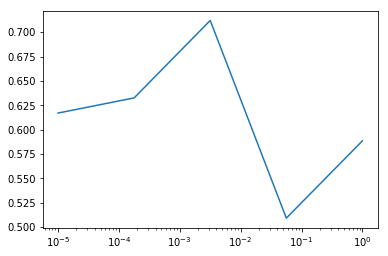

In [12]:
lr_list = np.logspace(-5, 0, 5)

acc_list = []
std_list = []

for lr in lr_list:
    acc, std = cross_validation(ConvNet1, x_train, y_train, epochs=1000, lr=lr)
    acc_list.append(acc)
    std_list.append(std)
    
plt.semilogx(lr_list, acc_list)

In [18]:
save_obj((acc_list, std_list), 'acc_std_convnet1')

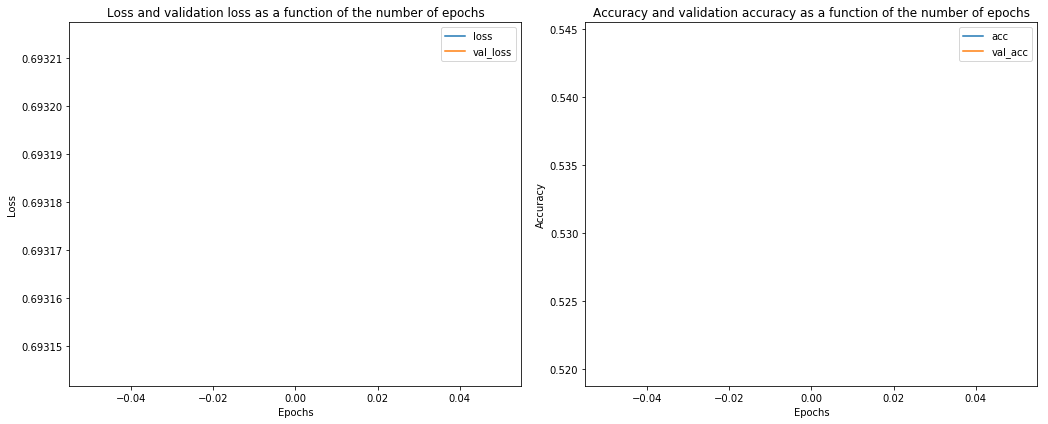

In [27]:
model = ConvNet1Crop42()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1, lr=5*1e-5, batch_size=16,
                    standardize=True, noise=2, crop=42)
plot_history(history)

/home/quentin/Documents/Courses/Deep learning/Projects/project1/src/conv_models.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.Softmax()(x)


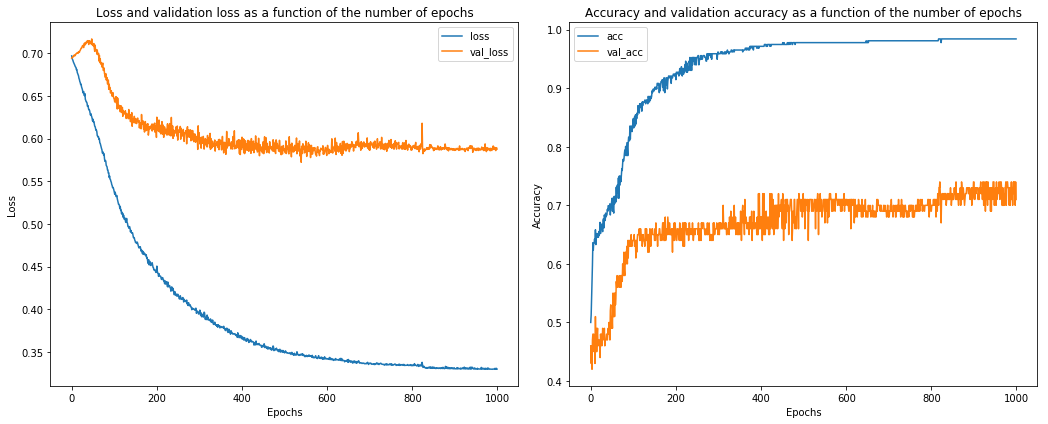

In [4]:
model = ConvNet1()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=5*1e-5, batch_size=16,
                    standardize=True, noise=2, crop=False)
plot_history(history)

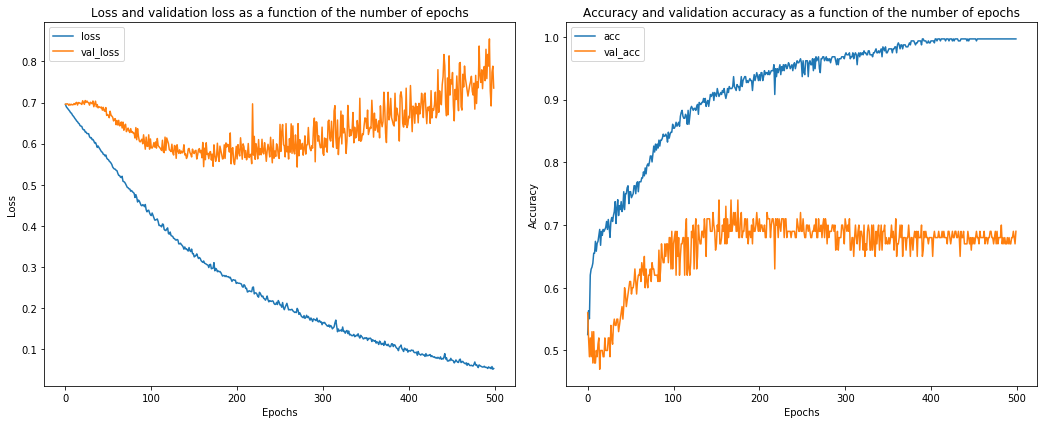

In [4]:
model = ConvNet1()
history = model.fit(x_train, y_train, x_test, y_test, epochs=500, lr=5*1e-5, batch_size=16,
                    standardize=True, noise=2, crop=True)
plot_history(history)

### Cross validation over the number out channels

Should we do this? I am not sure it makes sense.

### Cross validation over the number of hidden neurons

Same for this.

## Convolutional network with 2 convolutions

In [3]:
from conv_models import ConvNet2

In [6]:
cross_validation(ConvNet2, x_train, y_train, epochs=1000, lr=5*1e-3)

(0.5501984126984127, 0.0835494175026312)

In [23]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=1e-5, batch_size=4,
                    standardize=True, noise=2, crop=True)
plot_history(history)

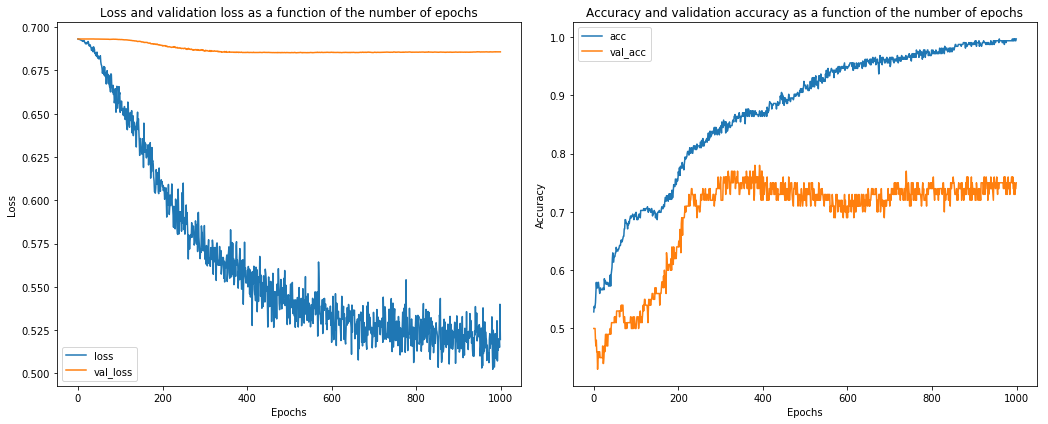

In [24]:
plot_history(history)

In [25]:
model.compute_accuracy(x_test, y_test)

0.75

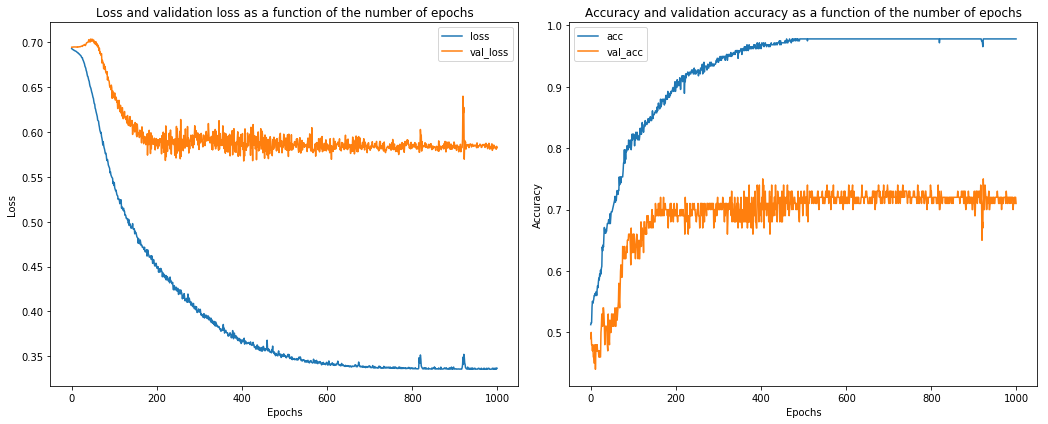

In [7]:
plot_history(history)

In [10]:
early_stopping(history)

(0.36689605861902236, 0.567649781703949, 0.9683544303797469, 0.75)

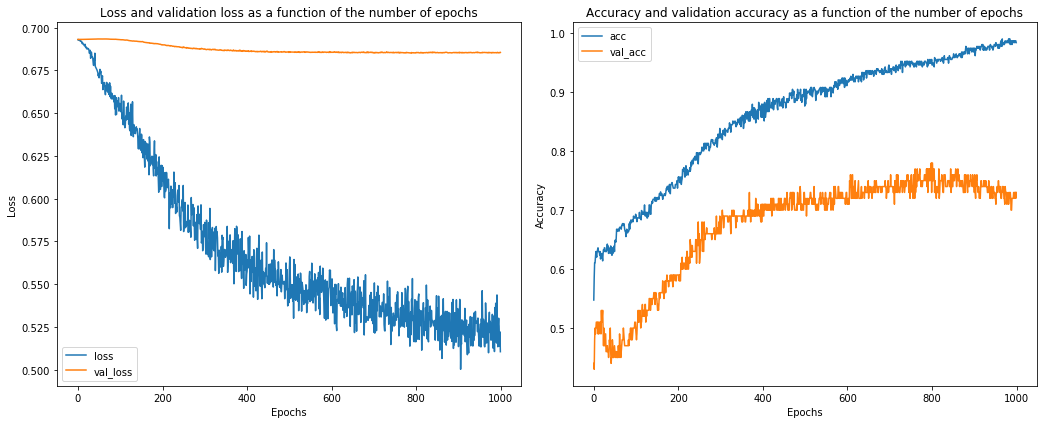

In [16]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=1e-5, batch_size=4,
                    standardize=True, noise=2, crop=False)
plot_history(history)

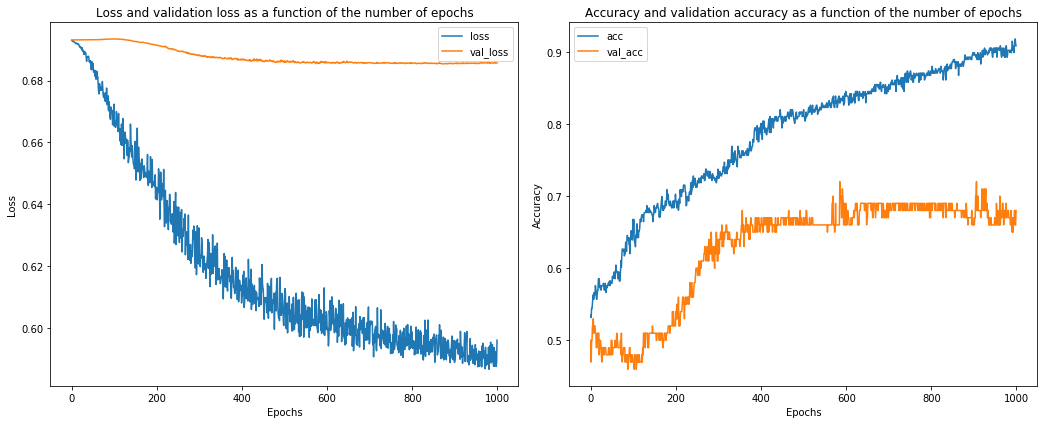

In [7]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000,  lr=1e-5, batch_size=8,
                    standardize=True, noise=2, crop=False)
plot_history(history)

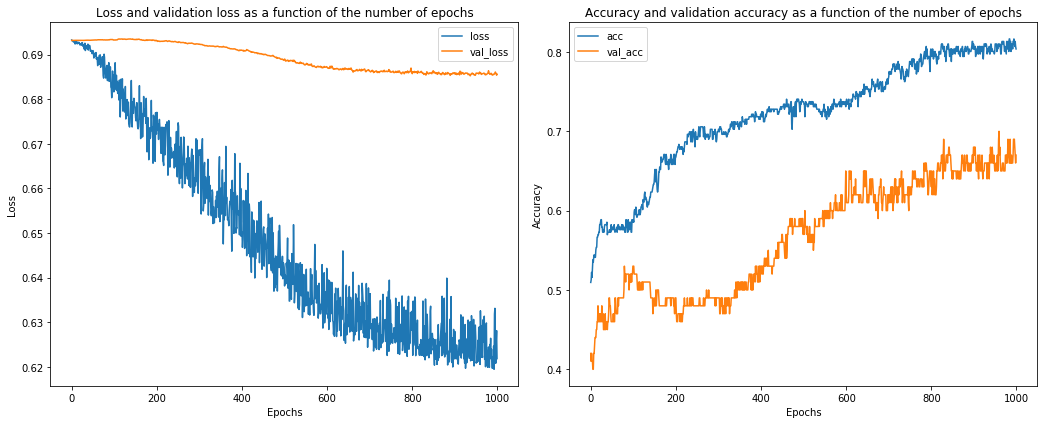

In [8]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=1e-5, batch_size=12,
                    standardize=True, noise=2, crop=False)
plot_history(history)

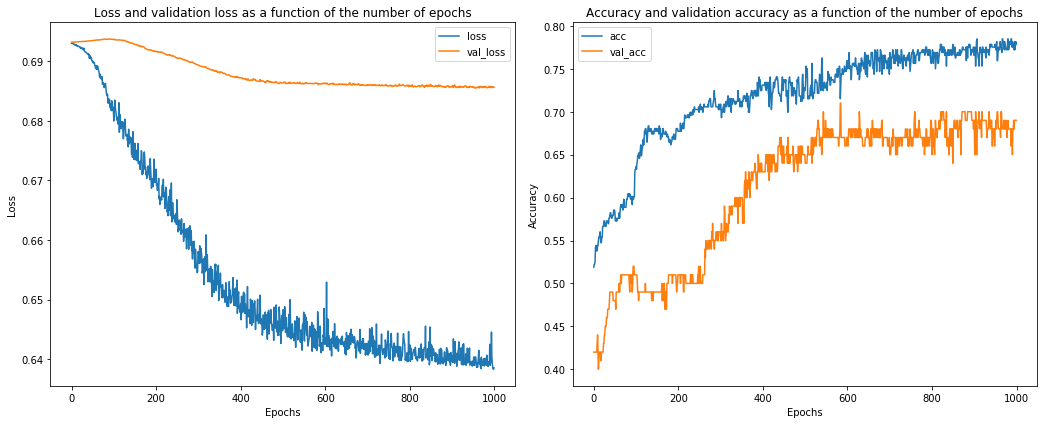

In [9]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=1e-5, batch_size=16,
                    standardize=True, noise=2, crop=False)
plot_history(history)

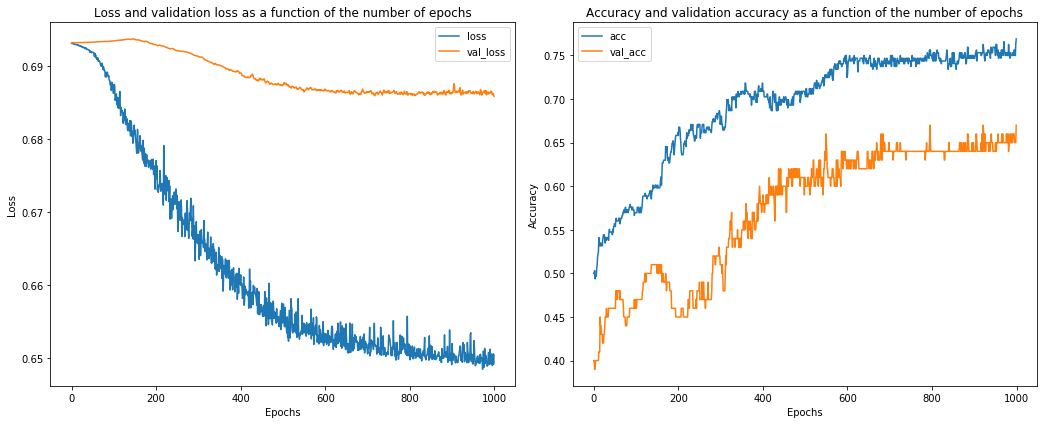

In [10]:
model = ConvNet2()
history = model.fit(x_train, y_train, x_test, y_test, epochs=1000, lr=1e-5, batch_size=20,
                    standardize=True, noise=2, crop=False)
plot_history(history)